In [11]:
import os 
import cv2
import glob
import matplotlib.pyplot as plt
import numpy as np
import mediapipe as mp
from n_utils.drawing_styles_modified import *
import pickle

In [12]:
mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [16]:
# Set dirs for accessing and saving grey-scale frames...
path = "../ISL-master/Frames/"
new_path = "../ISL-mediapipe/Frames/"

In [17]:
# Set dirs for accessing and saving RGB frames...
# path = "../ISL-master/Frames-colour/"
# new_path = "../ISL-mediapipe/Frames-colour/"

In [18]:
# Get list of files from directory
IMAGE_FILES = os.listdir(path)
len(IMAGE_FILES)

58114

In [15]:
converted = []
nonconverted = []

In [7]:
#Code adapted from convert_to_mediapipe.py written by @ERushe

with mp_hands.Hands(static_image_mode=True,
                    max_num_hands=2,
                    min_detection_confidence=0.5) as hands:
    
    for idx, file in enumerate(IMAGE_FILES):
        file = path + file
        image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
        image = cv2.flip(image,  1)
        image = cv2.cvtColor(image,cv2.COLOR_GRAY2RGB)
        
        # Get the name of the image
        output_file= os.path.split(file)[-1]

        # Turns out Mediapipe isn't great with grey-scale 
        # So this the pose estimation on these frames may not be as good as it couple be. 
        results = hands.process(image)
        
        # If the detection confidence does not reach the threshold, no landmarks will be returned.
        # So in this case, we just save the original image. 
        if not results.multi_hand_landmarks:
            cv2.imwrite(
                 os.path.join(new_path, 'mediapipe-{}'.format(output_file)), 
                 # We fipped it when reading it in so we need to flip it back. 
                 cv2.flip(image, 1)
             )
            nonconverted.append(output_file)
        else:
            # Create a black background (array of zeros)
            annotated_image = np.zeros(image.shape)
            for hand_landmarks in results.multi_hand_landmarks:
                # Draw the landmarks and their connections. 
                mp_drawing.draw_landmarks(
                  annotated_image,
                  hand_landmarks,
                  mp_hands.HAND_CONNECTIONS,
                  # Here we're using the customised version of drawing_styles.
                  get_default_hand_landmarks_style(), 
                  get_default_hand_connections_style()
                )
            cv2.imwrite(
                 os.path.join(new_path, 'mediapipe-{}'.format(output_file)), 
                 cv2.flip(annotated_image, 1)
             )
            
            converted.append(output_file)

INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


In [8]:
len(converted)

27840

In [9]:
len(nonconverted)

30274

In [34]:
# Saving the lists of converted vs. non-converted files
with open('../ISL-mediapipe/conv_vs_nonconv/grey_conv.bin', 'wb') as f:
    pickle.dump(converted, f)

In [35]:
with open('../ISL-mediapipe/conv_vs_nonconv/grey_nonconv.bin', 'wb') as f:
    pickle.dump(nonconverted, f)

In [ ]:
# with open('../ISL-mediapipe/conv_vs_nonconv/colour_conv.bin', 'wb') as f:
#     pickle.dump(converted, f)

In [ ]:
# with open('../ISL-mediapipe/conv_vs_nonconv/colour_nonconv.bin', 'wb') as f:
#     pickle.dump(nonconverted, f)

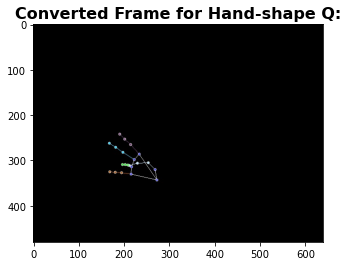

In [25]:
# Example of converted frame
img = cv2.imread(new_path + 'mediapipe-{}'.format(converted[5]))
plt.title('Converted Frame for Hand-shape Q:', fontweight='bold', fontsize=16)
plt.imshow(img)